# get all primers
- in the last order
- in previous orders

# get all readout probes
- ...
- ...

# run NUPACK
- simulate reverse one at a time

In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
import Bio.SeqUtils.MeltingTemp as mt
import os
import nupack

from dredFISH.Utils.__init__plots import *
from dredFISH.Utils import nupacku

In [2]:
def parse_encoding_complex(seq, option='+'):
    # P1-R-a-E-a-R-a-R-P2
    breakpoints = np.array([0, 20, 40, 41, 71, 72, 92, 93, 113, 133])
    if option == '+': # 1R-2R
        bp = breakpoints
        
        p1 = seq[bp[0]:bp[1]]
        R1 = seq[bp[1]:bp[2]]
        s1 = seq[bp[2]:bp[3]]
        E  = seq[bp[3]:bp[4]]
        s2 = seq[bp[4]:bp[5]]
        R2 = seq[bp[5]:bp[6]]
        s3 = seq[bp[6]:bp[7]]
        R3 = seq[bp[7]:bp[8]]
        p2 = seq[bp[8]:bp[9]]
        
        return E, R1, R2, R3, p1, p2, s1, s2, s3,  
        
    if option == '-': # 2R-1R
        bp = (133 - breakpoints)[::-1]
    
        p1 = seq[bp[0]:bp[1]]
        R1 = seq[bp[1]:bp[2]]
        s1 = seq[bp[2]:bp[3]]
        R2 = seq[bp[3]:bp[4]]
        s2 = seq[bp[4]:bp[5]]
        E  = seq[bp[5]:bp[6]]
        s3 = seq[bp[6]:bp[7]]
        R3 = seq[bp[7]:bp[8]]
        p2 = seq[bp[8]:bp[9]]
        
        return E, R1, R2, R3, p1, p2, s1, s2, s3,  
    
def parse_encoding(seq):
    """
    """
    # P1-R-a-E-a-R-P2
    breakpoints = np.array([0, 20, 40, 41, 71, 72, 92, 112])
    bp = breakpoints

    p1 = seq[bp[0]:bp[1]]
    R1 = seq[bp[1]:bp[2]]
    s1 = seq[bp[2]:bp[3]]
    E  = seq[bp[3]:bp[4]]
    s2 = seq[bp[4]:bp[5]]
    R2 = seq[bp[5]:bp[6]]
    p2 = seq[bp[6]:bp[7]]

    return E, R1, R2, p1, p2, s1, s2


In [3]:
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)

In [4]:
f = '/greendata/GeneralStorage/fangming/projects/dredfish/res_seq/dredFISH_PNMF_DPNMF_IEG_pFinal_Oligos_Nov2022_v6.fasta'
# f = "/bigstore/binfo/Probe_Sets/dredFISH_Final_Oligos.fasta"

In [5]:
resall = []
# encseqs = []
rdtseqs = []
rdtnames = []
p1seqs = []
p2seqs = []
names  = []

for i, record in enumerate(SeqIO.parse(f, "fasta")):
    seq = record.seq
    dsp = record.description
    
    E, R1,R2, p1,p2, s1,s2, = parse_encoding(seq)
    if (str(s1),str(s2)) == ('A', 'A'):
        pass
    else:
        print(s1,s2)
        break
        
    assert R1 == R2
    
    rdtseqs.append(str(R1))
    rdtnames.append(dsp.split(' ')[3])
    
    p1seqs.append(str(p1))
    p2seqs.append(str(p2))
    names.append(dsp.split(' ')[0])
    
    # if i > 100:
    #     break

In [6]:
np.unique(names)

array(['IEGs_n136_Wu_etal_2017_Neuron', 'dredFISH_DPNMFtree_Nov2022',
       'dredFISH_PNMF_Nov2022', 'neuroinflammation_GO',
       'rare_celltype_Pvalb_Vipr2_n115', 'validation1_NP_CT_L6b',
       'validation2_DG_SUB_CA'], dtype='<U30')

In [7]:
p1seqs = np.unique(p1seqs)
p2seqs = np.unique(p2seqs)
seqs_enc = np.hstack([p1seqs, p2seqs])
seqs_enc

array(['ACGATCTGCTGCGCGTACCT', 'CATGGCATTCTTCGCCGGCT',
       'CCTGCACAAATCGTTGCGGT', 'CGCTTTCGAATACGCCGAGT',
       'GCGTGTAGGCACGCAAGAGT', 'TCCTCCGACCGAAGCTGGAT',
       'TGTTCCGCACGCCGTCTCTT', 'CGTTAACCTGGCCCGGCTAC',
       'CGTTAACTGTGACCGCCCGT', 'GCGTACGAGACCCGGTACTG',
       'GGTTAACAGGCGTCGGCTGA', 'GGTTAACTCGCGACACGTGG',
       'TGCTAGCCAACTAACGCGCC', 'TGTTAACGGAAACGCGACGG'], dtype='<U20')

In [8]:
nupacku.get_num_combinations(len(seqs_enc)+1)

135.0

In [9]:
# temps = [37], # [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],

conc_r = 1e-6 # ~ 1 uM
conc_e = 1/100*conc_r # changes as we go (exponential growth)
sodium = 1 # 0.3  # 300 mM

temps = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
resall, emaps, raw_concs, tms = nupacku.simulate_cross_binding(
                           seqs_enc, 
                           seqs_tag=None, 
                           conc_r=conc_r,
                           conc_e=conc_e, 
                           temps=temps,
                           sodium=sodium,
                           material='dna',
                           adaptive=False,
                         )


>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............


In [10]:
resall

,readout_idx,readout_tag,tm,t,precision,usage,recall
0,0,0,80.182556,25,0.801112,0.010000,1.000000
1,1,1,79.704430,25,0.164400,0.010000,1.000000
2,2,2,77.776001,25,0.871359,0.010000,1.000000
3,3,3,76.470762,25,0.288094,0.010000,1.000000
4,4,4,78.976928,25,0.997093,0.010000,1.000000
...,...,...,...,...,...,...,...
219,9,9,77.798225,100,0.234569,0.000023,0.002312
220,10,10,78.576716,100,0.387655,0.000060,0.005964
221,11,11,76.900319,100,0.128285,0.000019,0.001911
222,12,12,79.127619,100,0.179208,0.000015,0.001482


In [11]:
res = raw_concs[40][0]

In [12]:
def view_raw(res, ax=None):
    """
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,3))
    sns.scatterplot(data=res, x='order', y='log10frac', hue='group', s=10)
    ax.legend(bbox_to_anchor=(1,1))
    sns.despine(ax=ax)

In [13]:
def view_emap(emap, baseconc, ax=None, title=None, vmax=0, vmin=-3):
    """
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(5,4))
    mat = np.log10(np.vstack(emap)/baseconc)
    sns.heatmap(mat, 
                xticklabels=5,
                yticklabels=5,
                vmax=vmax, 
                vmin=vmin,
                cbar_kws=dict(shrink=0.5, label=f'log10(conc/baseline)', ticks=[-3, -2,-1,0]), 
                cmap='coolwarm',
                ax=ax,
               )
    ax.set_aspect('equal')
    if title is not None:
        ax.set_title(title)
    

In [14]:
def view_pr(resplot, ax_row, **kwargs):
    p, r = resplot['precision'], resplot['recall']
    minpr = np.minimum(p, r)
    f1 = 2/(1/p+1/r)
    
    ax = ax_row[0]
    ax.plot(resplot['t'], p, '-o', **kwargs)
    ax.set_xlabel('Celsius')
    ax.set_ylabel('Precision')
    sns.despine(ax=ax)
    
    ax = ax_row[1]
    ax.plot(resplot['t'], r, '-o', **kwargs)
    ax.set_xlabel('Celsius')
    ax.set_ylabel('Recall')
    sns.despine(ax=ax)
    
    ax = ax_row[2]
    ax.plot(resplot['t'], minpr, '-o', **kwargs)
    ax.set_xlabel('Celsius')
    ax.set_ylabel('Min (Prec., Recall)')
    ax.set_ylim([-.05,1.1])
    sns.despine(ax=ax)

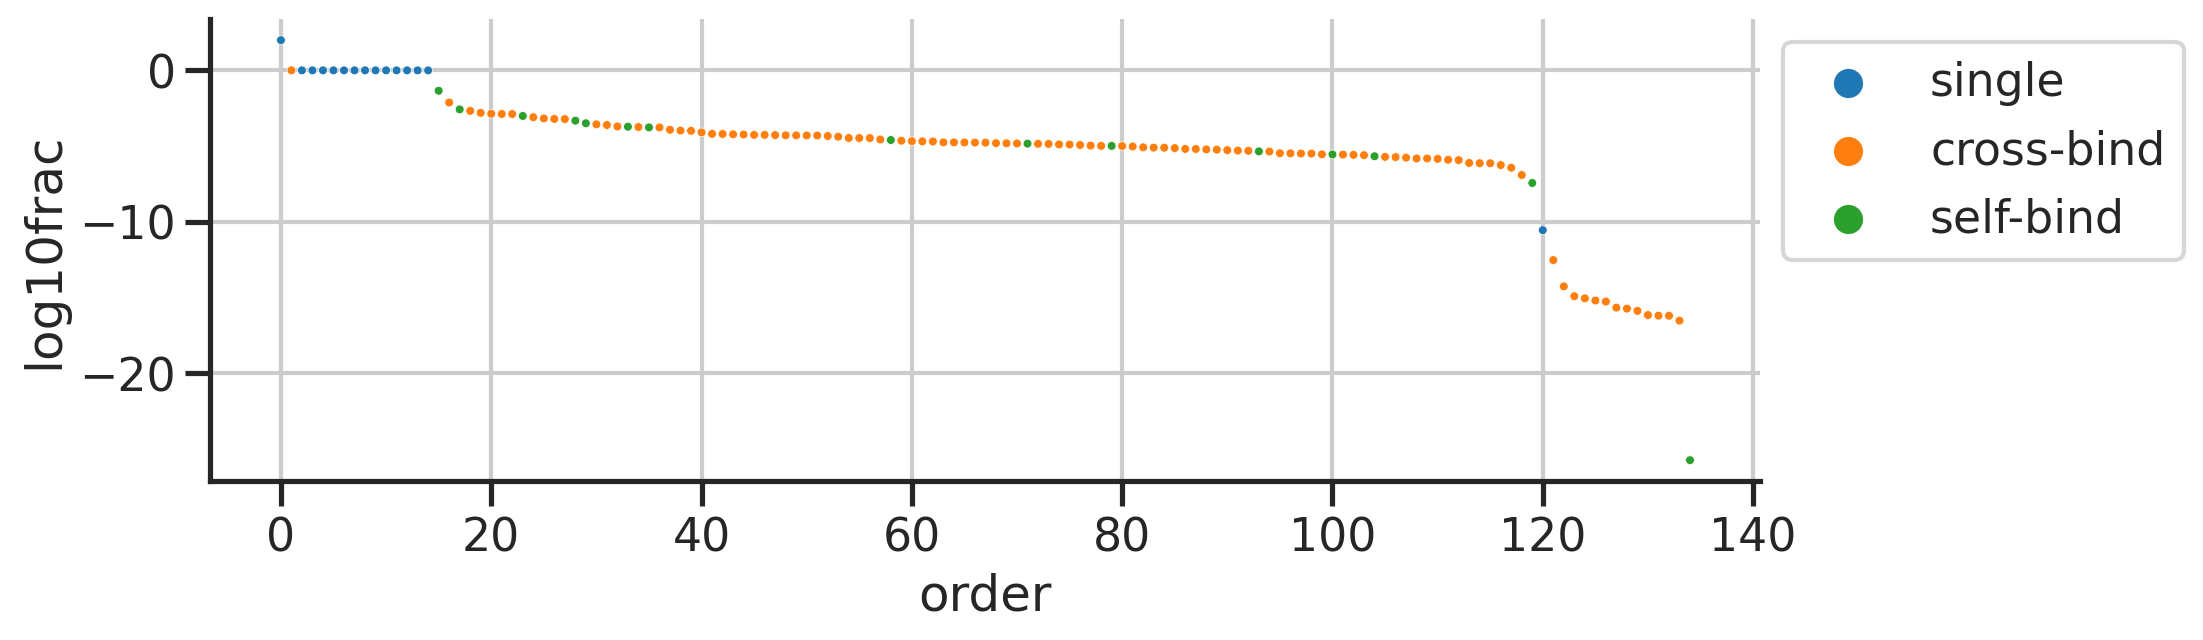

In [15]:
view_raw(res)

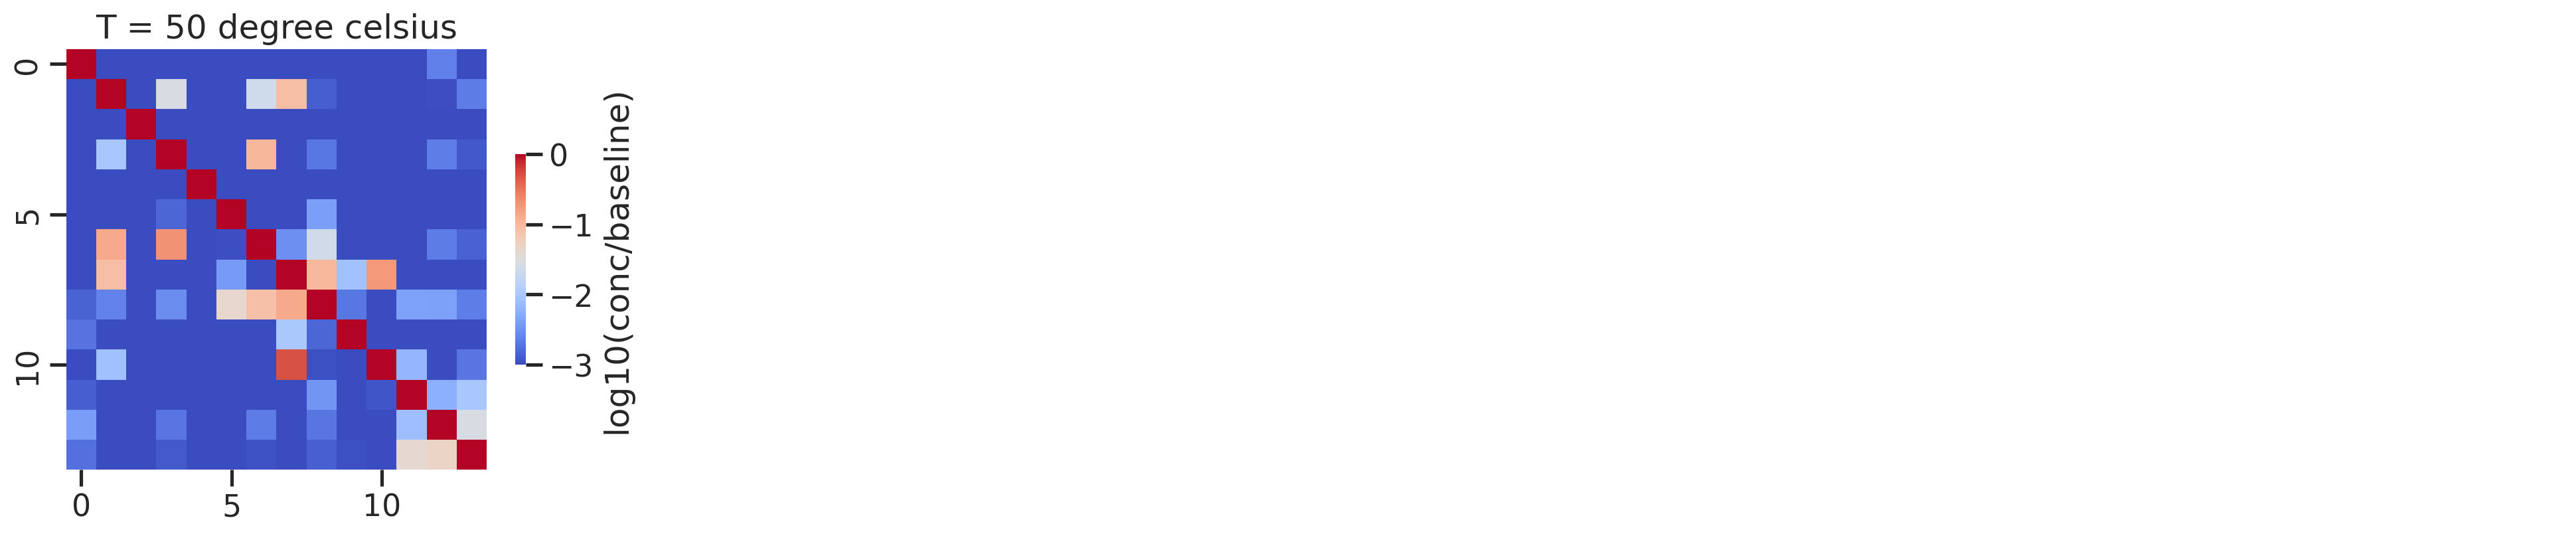

In [16]:
baseconc = conc_e

ts = [50]
n  = len(ts)
nx = 4
ny = int((n+nx-1)/nx)

fig, axs = plt.subplots(ny, nx, figsize=(nx*5,4*ny))
for ax, temp in zip(axs.flat, ts):
    emap = emaps[temp]
    title = f"T = {temp} degree celsius"
    view_emap(emap, baseconc, ax=ax, title=title, vmax=0, vmin=-3)

for ax in axs.flat[n:]:
    ax.axis('off')
    
fig.tight_layout()
plt.show()

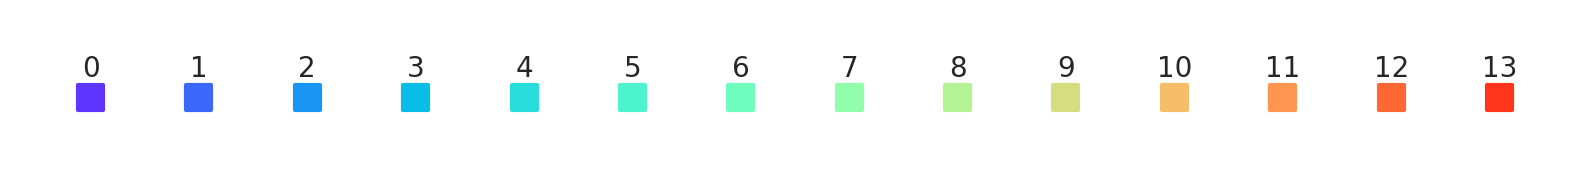

In [17]:
colors = sns.color_palette('rainbow', 14) 

fig, ax = plt.subplots(figsize=(10,1))
ax.scatter(np.arange(len(colors)), [0]*len(colors), c=colors, marker='s')
for i in range(len(colors)):
    ax.text(i, 0.01, i, fontsize=10, ha='center', va='bottom')
ax.axis('off')
plt.show()

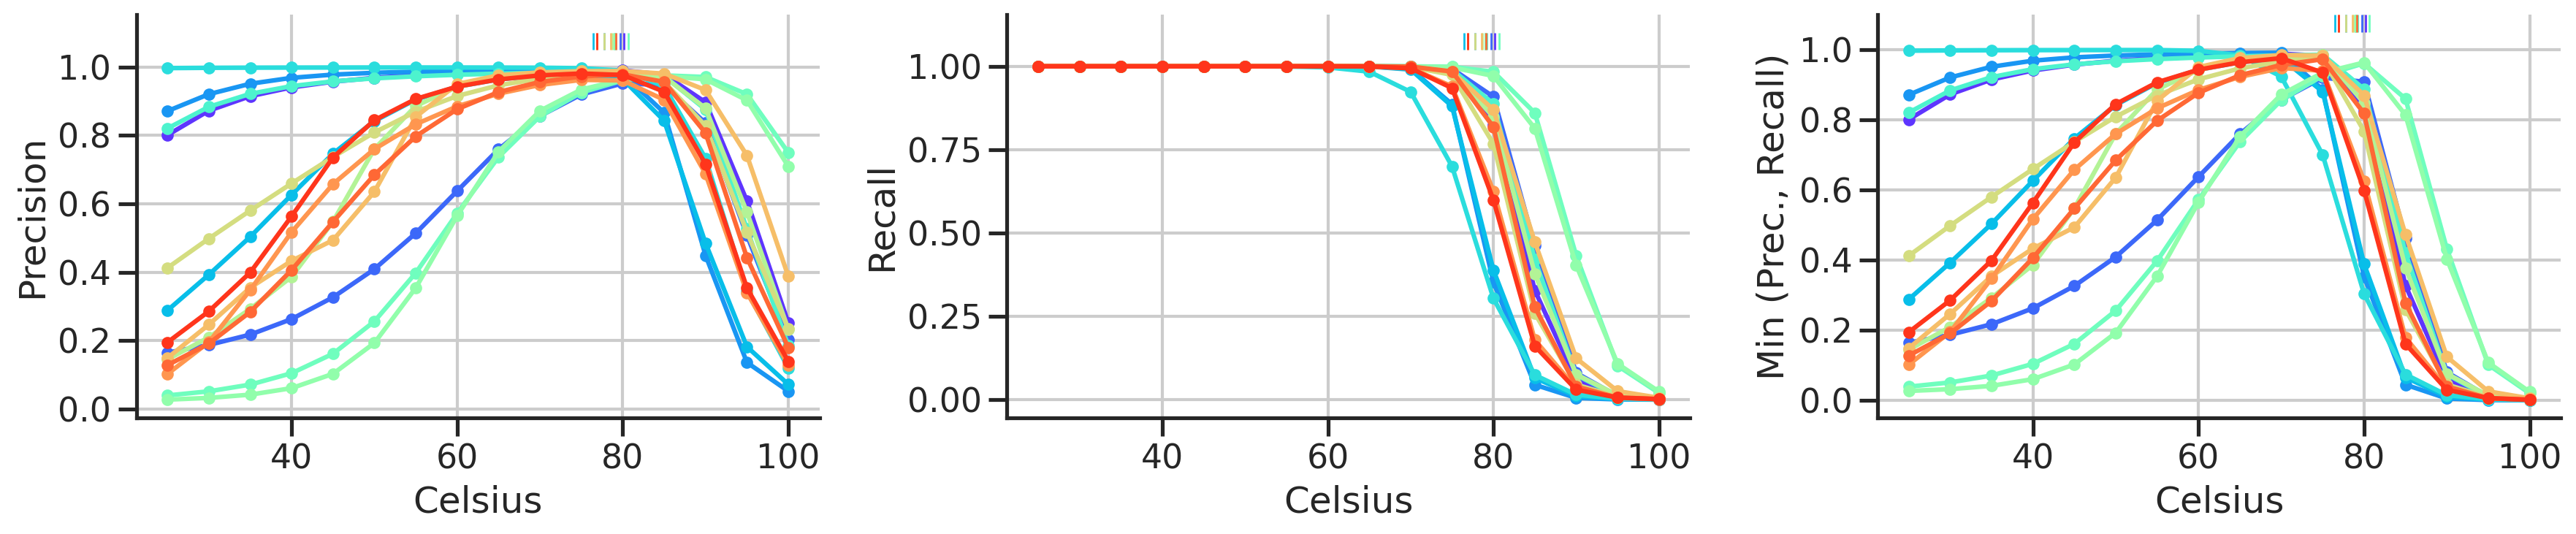

In [18]:
fig, axs = plt.subplots(1,3,figsize=(3*6,1*4))
ax_row = axs #[i]
for i in range(14):
    resplot = resall[resall['readout_idx']==i]
    view_pr(resplot, ax_row, color=colors[i], markersize=5)
    ax1, ax2, ax3 = ax_row
    ax1.vlines(tms[i], 1.05, 1.1, linewidth=1, color=colors[i])
    ax2.vlines(tms[i], 1.05, 1.1, linewidth=1, color=colors[i])
    ax3.vlines(tms[i], 1.05, 1.1, linewidth=1, color=colors[i])
    
fig.tight_layout()
plt.show()

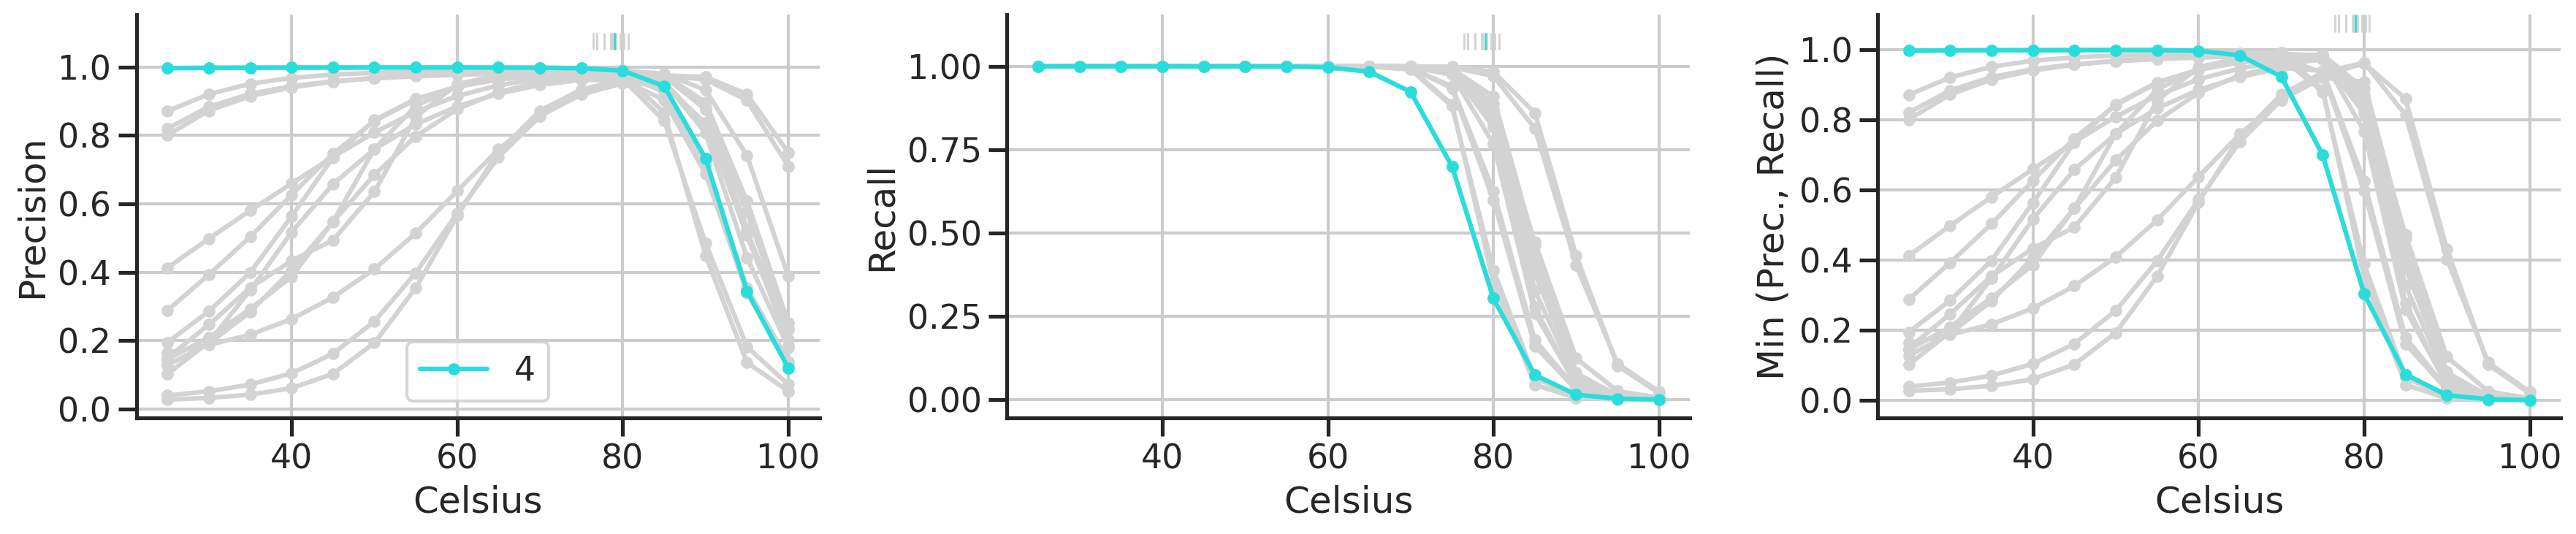

In [19]:
fig, axs = plt.subplots(1,3,figsize=(3*6,1*4))
ax_row = axs #[i]
for i in range(14):
    resplot = resall[resall['readout_idx']==i]
    color = 'lightgray'
    
    view_pr(resplot, ax_row, color=color, markersize=5)
    ax1, ax2, ax3 = ax_row
    ax1.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax2.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax3.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    
for i in [4]:
    resplot = resall[resall['readout_idx']==i]
    color = colors[i]
    label = f'{i}'#  hybe{seqs_tag[i]}'
    
    view_pr(resplot, ax_row, color=color, markersize=5, label=label)
    ax1, ax2, ax3 = ax_row
    ax1.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax2.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax3.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    
ax_row[0].legend()
fig.tight_layout()
plt.show()

In [20]:
seqs_enc

array(['ACGATCTGCTGCGCGTACCT', 'CATGGCATTCTTCGCCGGCT',
       'CCTGCACAAATCGTTGCGGT', 'CGCTTTCGAATACGCCGAGT',
       'GCGTGTAGGCACGCAAGAGT', 'TCCTCCGACCGAAGCTGGAT',
       'TGTTCCGCACGCCGTCTCTT', 'CGTTAACCTGGCCCGGCTAC',
       'CGTTAACTGTGACCGCCCGT', 'GCGTACGAGACCCGGTACTG',
       'GGTTAACAGGCGTCGGCTGA', 'GGTTAACTCGCGACACGTGG',
       'TGCTAGCCAACTAACGCGCC', 'TGTTAACGGAAACGCGACGG'], dtype='<U20')

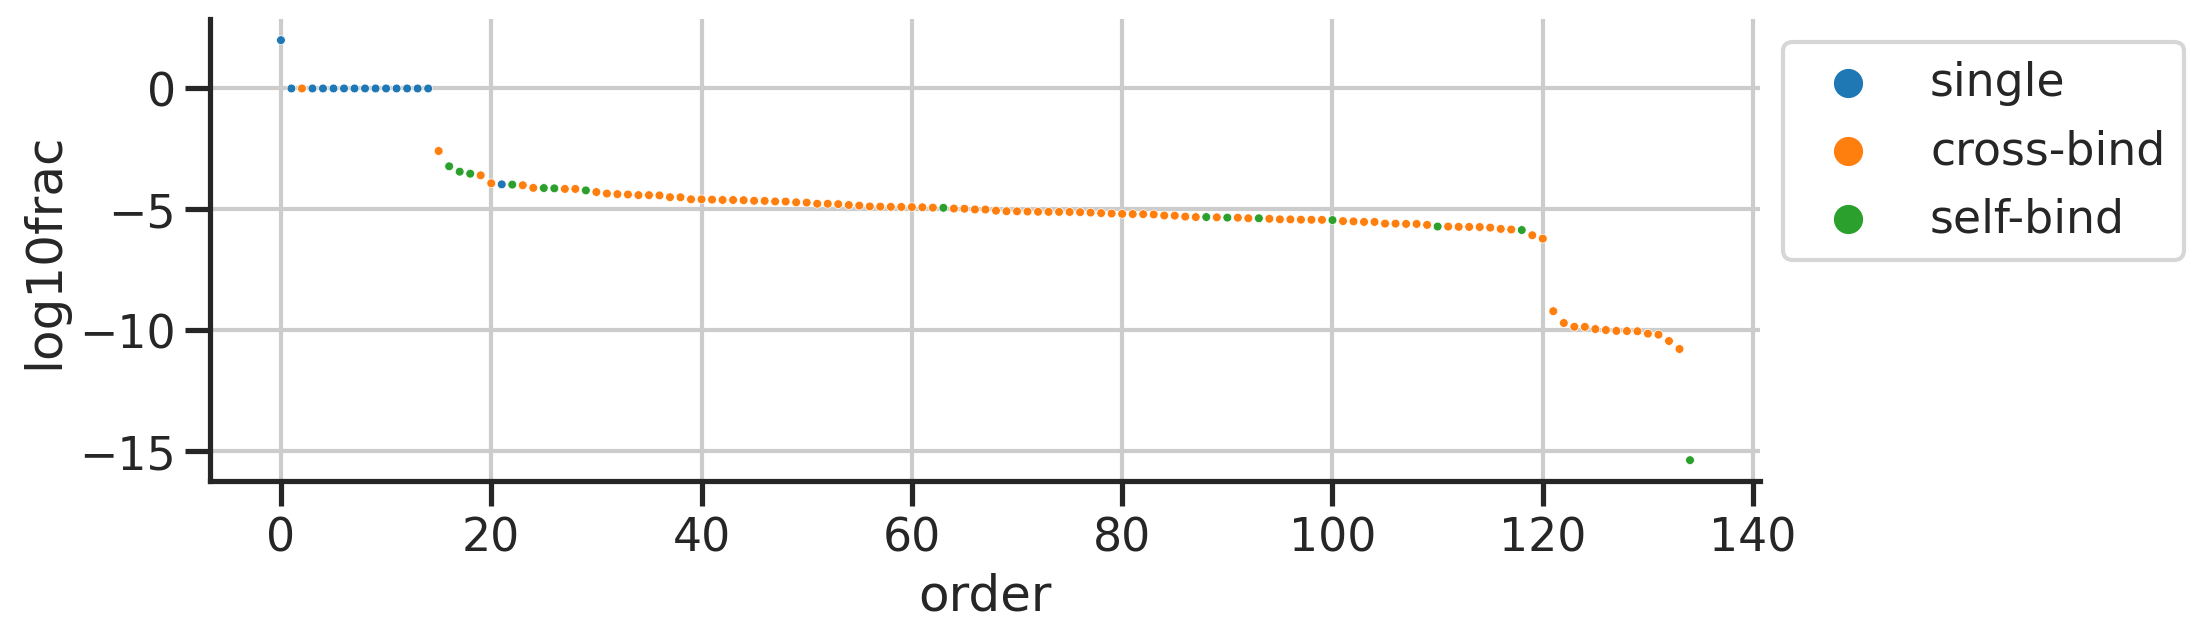

In [21]:
res = raw_concs[50][4]
view_raw(res)

In [22]:
res.to_csv('test.csv')

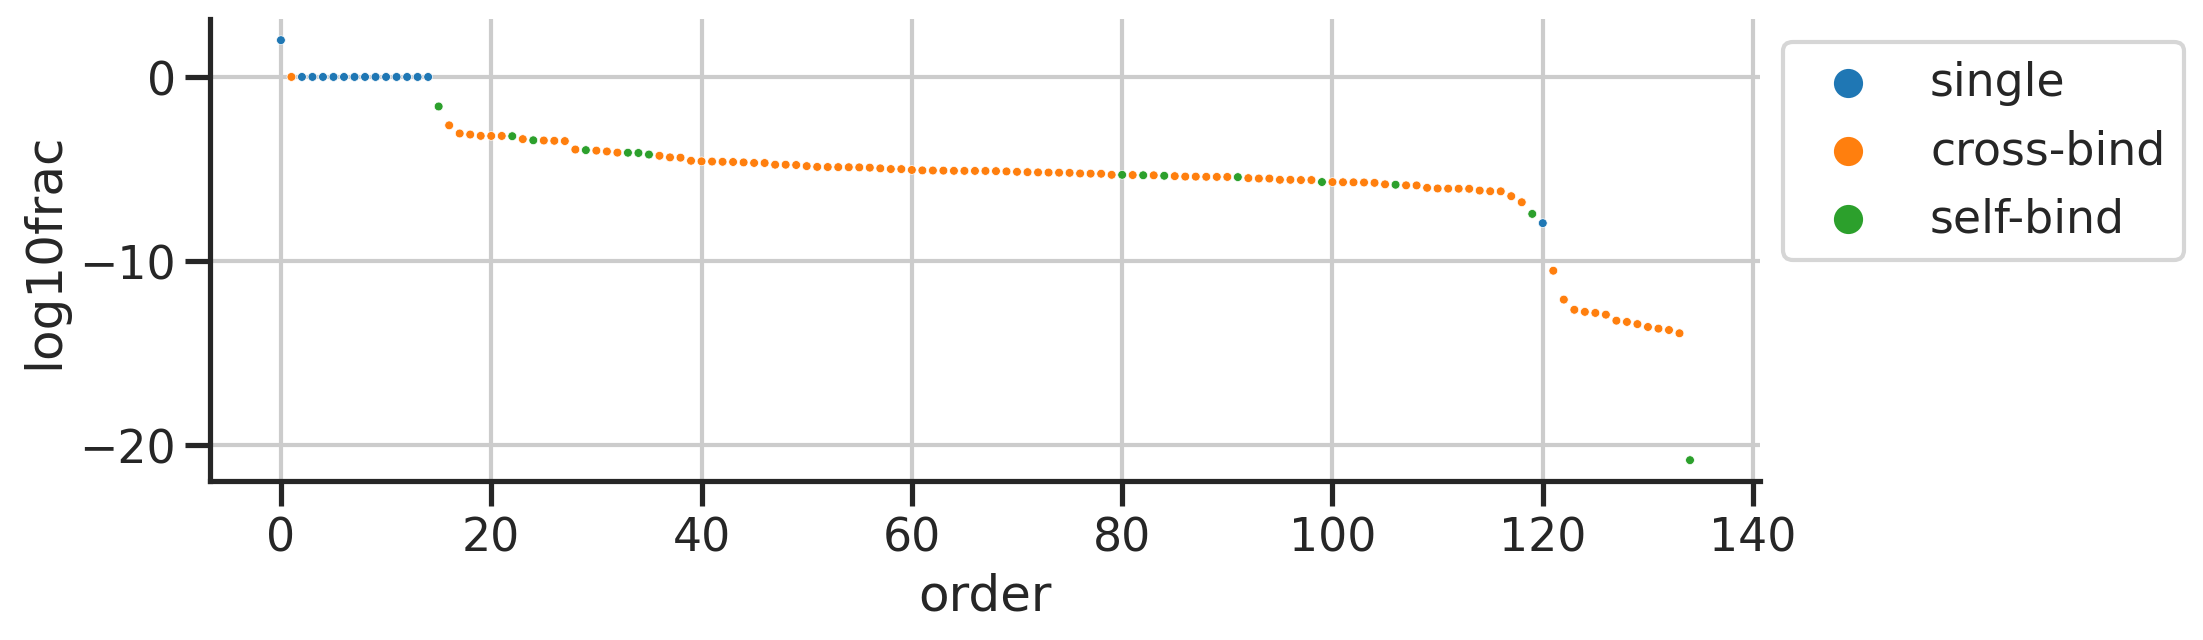

In [23]:
res = raw_concs[50][0]
res.to_csv('test2.csv')
view_raw(res)

# why is the outlier (#4) not captured by Tm?
- improve the log10frac plot
- linear scale
- add more categories
- ...

In [24]:
[get_gc(seq) for seq in seqs_enc]

[0.6, 0.6, 0.55, 0.55, 0.6, 0.6, 0.6, 0.65, 0.6, 0.65, 0.6, 0.6, 0.6, 0.55]

In [25]:
'GCGTGTAGGCACGCAAGAGT'

'GCGTGTAGGCACGCAAGAGT'

# add readout probes to the simulations